In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%ls -l -h ../data/

total 171312
-rw-r--r--  1 nickkon  staff    12K Aug 17 16:31 gm_2008_region.csv
-rwxr-xr-x@ 1 nickkon  staff   2.4M Aug 25  2016 kc_house_data.csv*
-rw-r--r--@ 1 nickkon  staff    73M Sep  3 12:27 mnist_digits.csv
-rwxr-xr-x  1 nickkon  staff   273K Jul  4  2018 telecom_churn.csv*


In [3]:
# https://www.kaggle.com/c/digit-recognizer/data
df = pd.read_csv("../data/mnist_digits.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
# df.dtypes

In [8]:
y = df['label']
X = df.drop(columns=['label'])

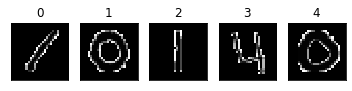

In [9]:
# display images

N = 5
f, ax = plt.subplots(1, N)
for i in range(N):
    arr = X.loc[i, :].values
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    ax[i].set_title('%d' % i)
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    ax[i].imshow(two_d, interpolation='nearest', cmap='gray')

In [10]:
y.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

## Classify

In [11]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.8)

In [16]:
# base_estimator = RandomForestClassifier(n_estimators=20)
# base_estimator = RidgeClassifier()
base_estimator = BaggingClassifier(RidgeClassifier())
# base_estimator = XGBClassifier(n_estimators=30)

clf = (base_estimator)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=20,
                                                     n_jobs=None,
                                               

In [27]:
len(clf.estimators_)

10

In [25]:
OneVsRestClassifier?

In [17]:
y_pred = clf.predict(X_test)

In [18]:
X_train.shape

(8400, 784)

### Evaluate

In [19]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

In [20]:
f1_score(y_test, y_pred, average='weighted')

0.9318111804138614

In [21]:
accuracy_score(y_test, y_pred)

0.9318452380952381